# <u>Avocado Dataset Analysis and ML Prediction</u>

<a id=section1></a>

### * Problem Statement

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(EDA)__ for analysis purpose.

- In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘region’,’type’
* Date: ‘Date’
* Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
* Target:‘AveragePrice’


<a id=section2></a>

### * Data Loading and Description

- This data was downloaded and provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
- Represents weekly 2018 retail scan data for National retail volume (units) and price.
- The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

- The unclear numerical variables terminology is explained in the next section:

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Unamed: 0’</td><td>Its just a useless index feature that will be removed later</td></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
</table>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  This is separate from the ipykernel package so we can avoid doing imports until


- Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

<a id=section3></a>

<a id=section4></a>

### * Understanding the Avocado Dataset

- Lets check our data shape:
- __Dataset__  has __18249 rows__ and __14 columns.__

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [6]:
df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Well as a first observation we can see that we are lucky, we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [8]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [9]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Lets check the head to see what we have done:

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<a id=section7></a>


### * Data Visualisation and Questions answered

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section8></a>

Avocados Demand (Conventional or Organic)?__

In [14]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

- Just over __2% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

<a id=section9></a>

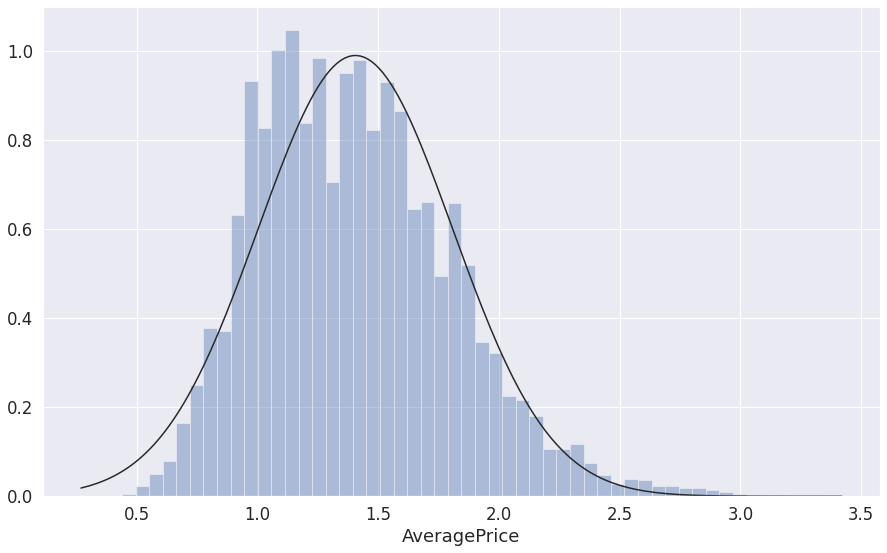

In [ ]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

- Let's look at average price of conventional vs. organic. 

<a id=section10></a>

- __Q.3 How Average price is distributed over the months for Conventional and Organic Types?__

<Figure size 1296x720 with 0 Axes>

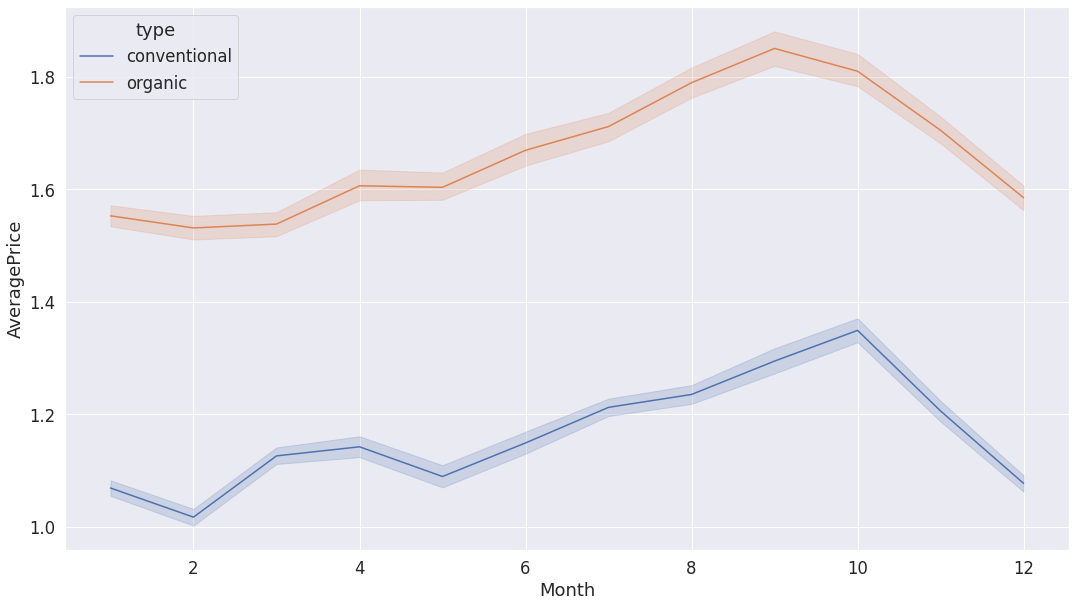

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

- Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

###  * Now lets plot Average price distribution based on region 

<a id=section11></a>

TOP 5 regions where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

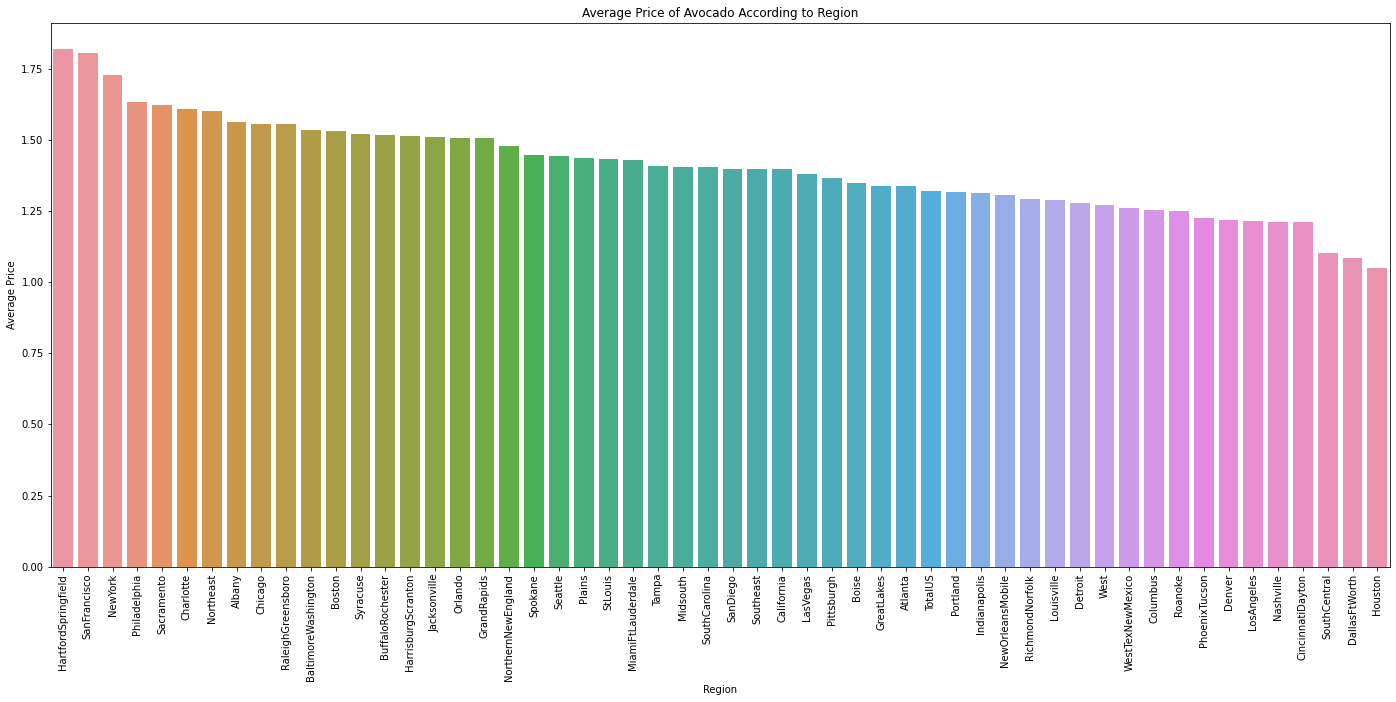

In [16]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- <ul>Looks like these region are where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section12></a>

TOP 5 regions where Average consumption is very high

<Figure size 1584x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Average of Total Volume')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

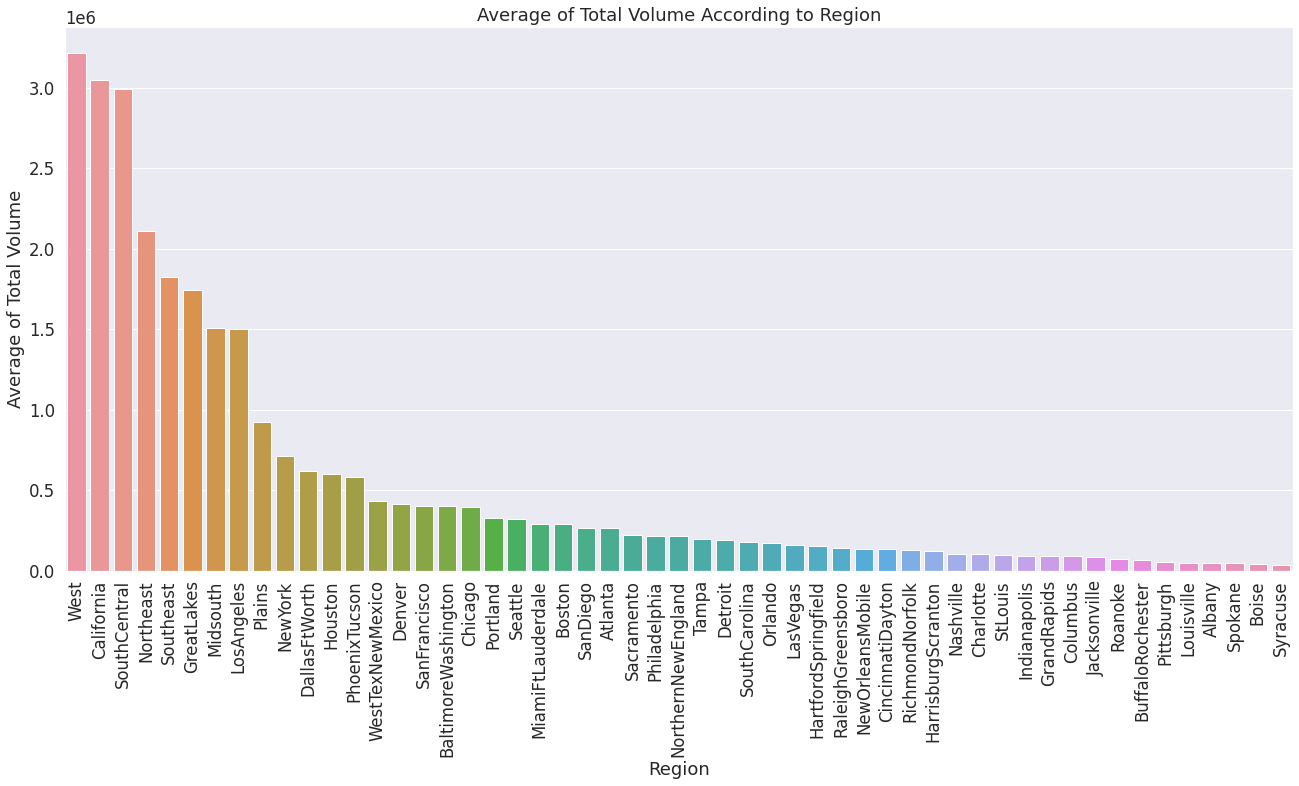

In [ ]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- <ul>Looks like these region are where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section13></a>

Which year and for which region was the Average price the highest?

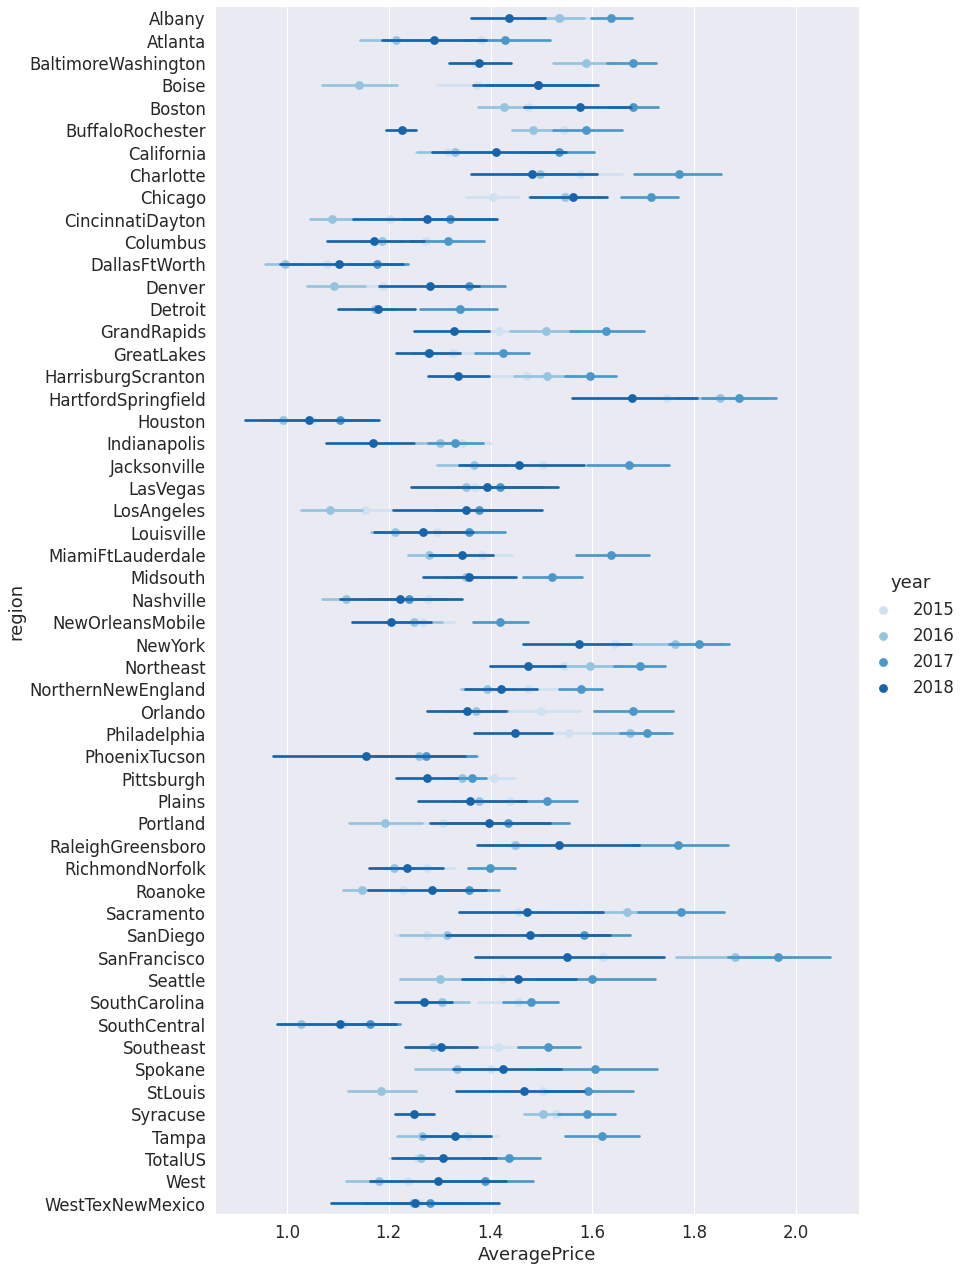

In [ ]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. If you'll search it on google, you'll find the same.__

<a id=section14></a>

Price is distributed over the date column

- Now lets do some plots!! I'll start by plotting the Avocado's Average Price  through the Date column

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Average Price')

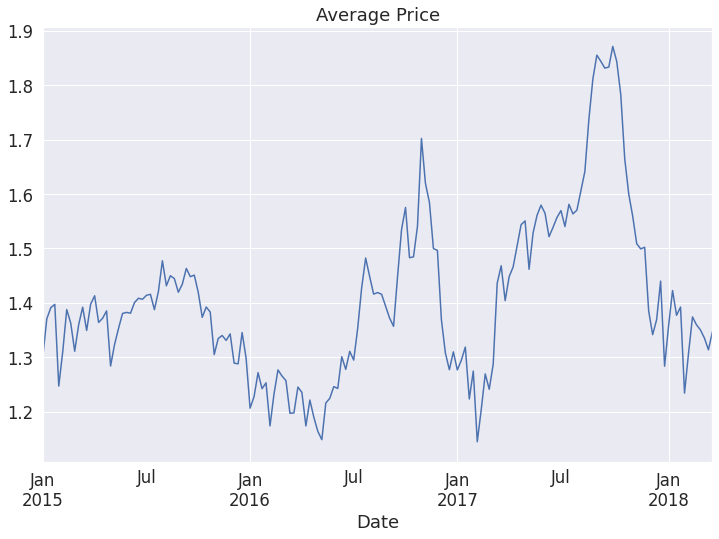

In [ ]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.
- Cool right? now lets have an idea about the relationship between our Features(Correlation)

<a id=section15></a>

dataset features are correlated with each other

<Figure size 864x432 with 0 Axes>

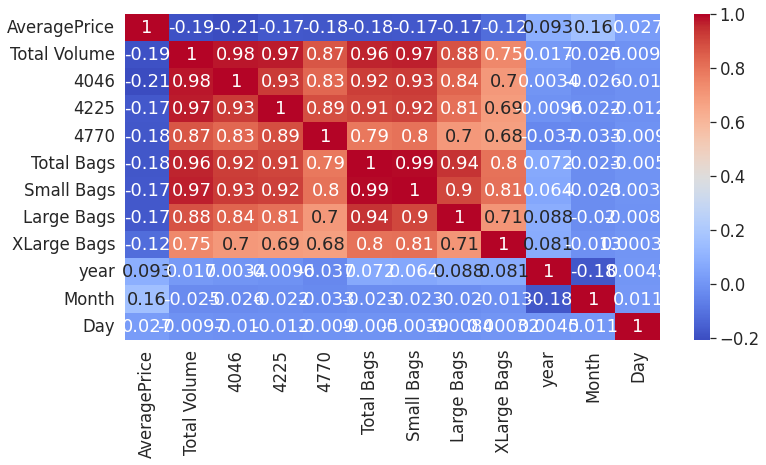

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

- As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

- First we have to do some Feature Engineering on the __categorical Features : region and type__

<a id=section16></a>

## * Feature Engineering for Model building

In [15]:
df['region'].nunique()

54

In [17]:
df['type'].nunique()

2

- As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [18]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [19]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [20]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


<a id=section17></a>

In [32]:
df_final.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
Month             int64
Day               int64
type_organic      uint8
dtype: object

In [38]:
#  Divide data into predictors and target
#     First 2-13 columns are predictors

X = df_final.iloc[ :, 1:13]
X.head(2)


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0


In [51]:
df_final['AveragePrice_cat'] = pd.cut(df_final['AveragePrice'],4, labels=["Low Priced", "Medium Priced", "High Priced", "Very High Priced"])

In [52]:
df_final

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic,AveragePrice_cat
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0,Medium Priced
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0,Medium Priced
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0,Low Priced
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0,Low Priced
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0,Medium Priced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1,Medium Priced
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1,Medium Priced
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1,High Priced
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1,High Priced


In [53]:

print("\n\nTarget,y, values")
y = df_final['AveragePrice_cat']
y.head()



Target,y, values


0    Medium Priced
1    Medium Priced
2       Low Priced
3       Low Priced
4    Medium Priced
Name: AveragePrice_cat, dtype: category
Categories (4, object): ['Low Priced' < 'Medium Priced' < 'High Priced' < 'Very High Priced']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
 Split dataset into train and validation parts
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)


x_train.shape        # (13686, 12)
x_test.shape         # (4563, 12)
y_train.shape        # (13686,)
y_test.shape         # (4563,)

(13686, 12)

(4563, 12)

(13686,)

(4563,)

In [55]:
################# CC. Create pipeline #################
#### Pipe using XGBoost

import numpy as np
import pandas as pd


#  Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

#  Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

#  Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#  Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#  Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
#  Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

#   Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

In [56]:
#  Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

#  Permutation feature importance
from sklearn.inspection import permutation_importance

In [57]:
#  Misc
import time
import os
import gc
import random

#  Used in Randomized parameter search
from scipy.stats import uniform

In [58]:
# 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
#  Set option to dislay many rows
pd.set_option('display.max_columns', 100)

In [60]:
##################### DD. Grid Search #################

#   Specify xgboost parameter-range
#  Dictionary of parameters (16 combinations)
#     Syntax: {
#              'transformerName__parameterName' : [ <listOfValues> ]
#              }
#
#  What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [78]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [6,12],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2



In [91]:
#  Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [4,7],
               }                               # Total: 2 * 2 * 2 * 2



In [80]:
#   Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified

#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )



In [81]:
#  Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(x_train, y_train)
end = time.time()
print()
(end - start)/60               



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(n_jobs=3,
                                                      silent=False))]),
             n_jobs=2,
             param_grid={'pca__n_components': [12, 12],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

1.1898802638053894

In [82]:

f"Best score: {clf.best_score_} "           


print()
f"Best parameter set {clf.best_params_}"

'Best score: nan '

"Best parameter set {'pca__n_components': 12, 'xg__learning_rate': 0.03, 'xg__max_depth': 4}"

In [83]:
#  Make predictions using the best returned model
y_pred = clf.predict(x_test)
print("--Few predictions--\n")
y_pred[:2]

#  Accuracy score
print("\n\n--Accuracy Score--\n")
#accuracy = accuracy_score(y_test, y_pred)
#accuracy = clf.score(x_test, y_test)
#accuracy * 100.0             

#  Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

#  F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1, average='weighted')      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0, average='weighted')      


--Few predictions--



array(['Medium Priced', 'Low Priced'], dtype=object)



--Accuracy Score--



--Confusion Matrix--



array([[   6,    0,  587,    0],
       [   0,  915,  408,    0],
       [   1,  190, 2409,    0],
       [   0,    0,   47,    0]])



--F1 Score pos-label: 1--



0.6748229911089716



--F1 Score pos-label: 0--



0.6748229911089716

In [84]:
#  Get feature importances from GridSearchCV best fitted 'xg' model
#     See stackoverflow: https://stackoverflow.com/q/48377296

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(12,)



---Feature importances---



array([0.15518723, 0.03813285, 0.01200557, 0.38039684, 0.05774663,
       0.03692515, 0.03989116, 0.04330801, 0.07269797, 0.05364389,
       0.05105431, 0.05901041], dtype=float32)

In [85]:
#  Store column names somewhere
#     for use in feature importance

colnames = X.columns.tolist()

In [86]:
colnames

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'Month',
 'Day',
 'type_organic']

In [87]:
#  Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')


df_imp

,imp
4225,0.012006
Small Bags,0.036925
4046,0.038133
Large Bags,0.039891
XLarge Bags,0.043308
Day,0.051054
Month,0.053644
Total Bags,0.057747
type_organic,0.059010
year,0.072698


In [88]:
#  First five columns with least feature importance are:

list(df_imp.index.values[:5])

['4225', 'Small Bags', '4046', 'Large Bags', 'XLarge Bags']

In [93]:
#  Let us drop these from X_train and X_test
Xtrain = x_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = x_test.drop(columns = list(df_imp.index.values[:5]))

#  Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                     )
 
start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60               # 2 minutes

#  Make predictions
y_pred_dr = clf_dr.predict(Xtest)

# Compare results.
#      Results may be marginally better
f1_score(y_test,y_pred_dr, pos_label = 1, average='weighted')      # 0.6713443840199652
f1_score(y_test,y_pred_dr, pos_label = 0, average='weighted')      # 0.6713443840199652
f1_score(y_test,y_pred, pos_label = 1, average='weighted')      # 0.6748229911089716
f1_score(y_test,y_pred, pos_label = 0, average='weighted')      # 0.6748229911089716
##################################


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(n_jobs=3,
                                                      silent=False))]),
             n_jobs=2,
             param_grid={'pca__n_components': [7, 7],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=2)

1.4456728537877401

0.6713443840199652

0.6713443840199652

0.6748229911089716

0.6748229911089716

In [97]:
##################### Randomized Search #################

# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(6,12)}

In [98]:
#  Tune parameters using random search
#     Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )


In [99]:
# Run random search for 25 iterations. 2 minutes:

start = time.time()
rs.fit(x_train, y_train)
end = time.time()
print()
(end - start)/60   

Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(n_jobs=3,
                                                            silent=False))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(6, 12),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86ae64cc50>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)},
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=1)

1.0772820432980856

In [101]:
#  Evaluate
f"Best score: {rs.best_score_} " ;print()        
f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs.predict(x_test)


#  Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()    


'Best score: nan '

"Best parameter set: {'pca__n_components': 6, 'xg__learning_rate': 0.10781532217801315, 'xg__max_depth': 3, 'xg__n_estimators': 246} "

'Accuracy: 72.10168748630286'

'f1 score: 0.6961795866158023'

In [105]:

# For skopt routines
! pip install scikit-optimize

# For plotting skopt results
! pip install 'scikit-optimize[plots]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

In [107]:

# Laydown search space of parameters     
# https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769

params={
         'min_child_weight': Integer(0, 50),
         'max_depth': Integer(1, 10),
         'subsample': Real (0.5, 1.0, 'uniform'),
         'colsample_bytree': Real(0.5, 1.0, 'uniform'),
         'reg_lambda':Real(1e-5,100,prior = 'log-uniform'),
         'reg_alpha': Real(1e-5,100,prior= 'log-uniform'),
         'gamma': Real(1e-9, 0.5, 'log-uniform'),
         'learning-rate': Real(0.01,0.2,prior='log-uniform'),
         'scale_pos_weight': Real(1e-6, 500, 'log-uniform'),
         'n_estimators': Integer(50, 100)
        }

In [108]:
# Define our classifier:
bayes_tuner=BayesSearchCV(
                            XGBClassifier(
                                            n_jobs = 1,
                                            objective = 'binary:logistic',
                                            eval_metric = 'auc',
                                            silent=1,
                                            tree_method='approx'
                                            ),
                            params,
                            n_iter=5,              # No of parameter settings that are tried 
                            scoring='roc_auc',     # List of scores CANNOT be used
                            cv = StratifiedKFold(
                                                  n_splits=3,
                                                  shuffle=True,
                                                  random_state=42
                                                ),
                            refit = True, # Refit the best estimator so as to make predictions
                            verbose = 1,
                            return_train_score= True
                    )


In [109]:
# This function is called after each parameter
#      fitting to print current status:

def status_print(optim_result):
  """Status callback durring bayesian hyperparameter search"""

  # 10.2.1 Get all the models tested so far in DataFrame format
  # cv_results_: A dict with keys as column headers and
  #              values as columns
  #        model_results dataframe is not being printed
  model_results = pd.DataFrame(bayes_tuner.cv_results_)    
  
  # Get current parameters and the best parameters   
  # best_params_: A dict of parameter settings that 
  #               give the best results on the hold out data. 
  best_params = pd.Series(bayes_tuner.best_params_)
  
  print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(model_results),
        np.round(bayes_tuner.best_score_, 4),  # Score of best_estimator on the left out data.
        bayes_tuner.best_params_
    ))

In [110]:
# Begin parameter tuning

start = time.time()
res=bayes_tuner.fit(
                      x_train,
                      y_train,
                      #callback=status_print
                    )

end = time.time()
(end - start)/60   # 3 minutes on Colab

Fitting 3 folds for each of 1 candidates, totalling 3 fits


ValueError: ignored

#### Giving error as ROC curve scoring doesn't support multiclass categorical data

In [111]:

res.best_estimator_


NameError: ignored

In [ ]:

res.best_score_


In [ ]:

res.best_params_